# Imports

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm
import json

# Global Variables

In [2]:
sequences = [
    [5, 5, 5, 5, 5, 5, 5, 3],
    [7, 5, 5, 5, 5, 5, 5, 3],
    [7, 7, 5, 5, 5, 5, 5, 3],
    [6, 6, 5, 5, 5, 5, 5, 3],
    [7, 6, 6, 6, 6, 6, 6, 3],
    [6, 5, 5, 5, 5, 5, 5, 4],
    [7, 6, 5, 5, 5, 5, 5, 4],
    [6, 6, 6, 6, 6, 6, 6, 4],
    [7, 7, 6, 6, 6, 6, 6, 4],
    [7, 6, 6, 6, 6, 6, 6, 5]
]

# Core Classes and Functions

## Class 1: Binary Tree Node

In [3]:
class Node:
    def __init__ (self, value, left = None, right = None):
        self.value = value
        self.left = left
        self.right = right

## Function 1: Recognizing Graphic Degree Sequences in Linear Time

Reference: [Recognizing graphic degree sequences and generating all realizations (Zoltan Kiraly)](https://egres.elte.hu/tr/egres-11-11.pdf)

In [4]:
def lin_recog_graphic (d):
    n = len(d)

    if len(d) == 0 or sum(d) % 2 != 0:
        return False
    
    if max(d) >= n:
        return False

    d = sorted(d, reverse = True)
    
    w = n
    b = 0
    s = 0
    c = 0

    for k in range(1, n + 1):
        b += d[k - 1]
        c += w - 1
        while w > k and d[w - 1] <= k:
            s += d[w - 1]
            c -= k
            w -= 1
        if b > c + s:
            return False
        elif w == k:
            return True

## Function 2: Grow Tree by Nodes with Binary Values

In [5]:
def create_binaries (node, height, max_right):
    if height == 0:
        return
    node.left = Node(node.value + "0")
    if node.value.count("1") < max_right:
        node.right = Node(node.value + "1")
    create_binaries(node.left, height - 1, max_right)
    if node.right:
        create_binaries(node.right, height - 1, max_right)

## Function 3: Traverse Tree and Find Nodes Representing Graphic Sequences

In [6]:
def traverse_tree (node, dp, s):
    if node.left == None and node.right == None:
        dpp = [x - 1 if node.value[i] == "1" else x for i, x in enumerate(dp)]
        if node.value.count("1") == s and lin_recog_graphic(dpp):
            return [[node.value, dpp]]
        return []
    xl = traverse_tree(node.left, dp, s) if node.left else []
    xr = traverse_tree(node.right, dp, s) if node.right else []
    return xl + xr

## Function 4: Generate All Possible Graphs

Inspired by [Recognizing graphic degree sequences and generating all realizations (Zoltan Kiraly)](https://egres.elte.hu/tr/egres-11-11.pdf).

In [7]:
def generate_all_graphs (d, graph):
    if not lin_recog_graphic(d):
        return graph

    n = len(d)

    dp = d[:-1]
    s = d[-1]

    tree = Node("")

    create_binaries(tree, n - 1, s)
    valids = traverse_tree(tree, dp, s)

    graphs = []
    
    for mask, dpp in valids:
        ngraph = graph + [
            {i + 1, n} for i, x in enumerate(mask) if x == "1"
        ]
        if sum(dpp) == 0:
            graphs += [ngraph]
        else:
            graphs += generate_all_graphs(dpp, ngraph)

    return graphs

# Execution

In [8]:
results = []

In [9]:
for index, sequence in enumerate(sequences[::-1]):
    print(f"[{index + 1}] Sequence:", sequence)
    
    graphs = generate_all_graphs(sequence, [])

    graphs_obj = [nx.Graph(graph) for graph in graphs]

    isomorphs = []

    for i in tqdm(range(0, len(graphs_obj) - 1)):
        for j in range(i + 1, len(graphs_obj)):
            if j not in isomorphs:
                isomorphism = nx.is_isomorphic(graphs_obj[i], graphs_obj[j])

                if isomorphism:
                    isomorphs.append(j)

    noniso_graphs = [graph for i, graph in enumerate(graphs_obj) if i not in isomorphs]

    results.append(
        {
            "sequence": sequence,
            "graphs": [list(graph.edges) for graph in noniso_graphs]
        }
    )

    print(f"Number of nonisomorphic graphs: {len(noniso_graphs)}\n")

[1] Sequence: [7, 6, 6, 6, 6, 6, 6, 5]


100%|█████████████████████████████████████████| 44/44 [00:00<00:00, 5327.33it/s]


Number of nonisomorphic graphs: 1

[2] Sequence: [7, 7, 6, 6, 6, 6, 6, 4]


100%|███████████████████████████████████████████| 9/9 [00:00<00:00, 5757.01it/s]


Number of nonisomorphic graphs: 1

[3] Sequence: [6, 6, 6, 6, 6, 6, 6, 4]


100%|███████████████████████████████████████| 104/104 [00:00<00:00, 4206.19it/s]


Number of nonisomorphic graphs: 1

[4] Sequence: [7, 6, 5, 5, 5, 5, 5, 4]


100%|████████████████████████████████████████| 249/249 [00:01<00:00, 182.01it/s]


Number of nonisomorphic graphs: 5

[5] Sequence: [6, 5, 5, 5, 5, 5, 5, 4]


100%|███████████████████████████████████████| 1964/1964 [00:50<00:00, 39.22it/s]


Number of nonisomorphic graphs: 8

[6] Sequence: [7, 6, 6, 6, 6, 6, 6, 3]


100%|█████████████████████████████████████████| 14/14 [00:00<00:00, 6034.97it/s]


Number of nonisomorphic graphs: 1

[7] Sequence: [6, 6, 5, 5, 5, 5, 5, 3]


100%|█████████████████████████████████████████| 654/654 [00:08<00:00, 78.18it/s]


Number of nonisomorphic graphs: 9

[8] Sequence: [7, 7, 5, 5, 5, 5, 5, 3]


100%|█████████████████████████████████████████| 29/29 [00:00<00:00, 6911.46it/s]


Number of nonisomorphic graphs: 1

[9] Sequence: [7, 5, 5, 5, 5, 5, 5, 3]


100%|███████████████████████████████████████| 269/269 [00:00<00:00, 2153.10it/s]


Number of nonisomorphic graphs: 2

[10] Sequence: [5, 5, 5, 5, 5, 5, 5, 3]


100%|██████████████████████████████████████| 2624/2624 [00:23<00:00, 111.05it/s]

Number of nonisomorphic graphs: 3



In [10]:
with open("results.json", "w") as handler:
    json.dump(results, handler, indent = 3)
print("Results were saved!")

Results were saved!


# Visualization

In [11]:
with open("results.json", "r") as handler:
    results = json.load(handler)

Sequence: 7, 6, 6, 6, 6, 6, 6, 5


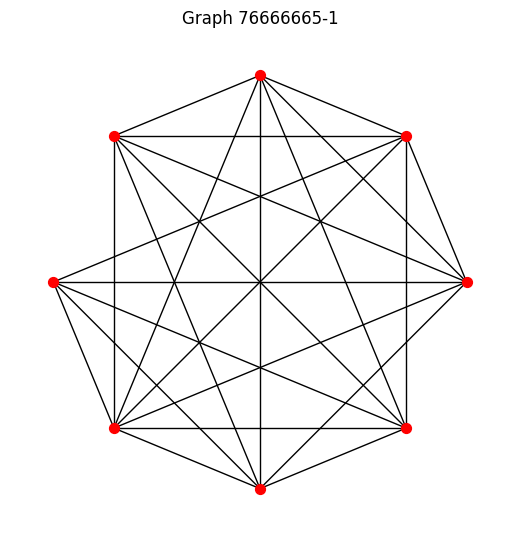


Sequence: 7, 7, 6, 6, 6, 6, 6, 4


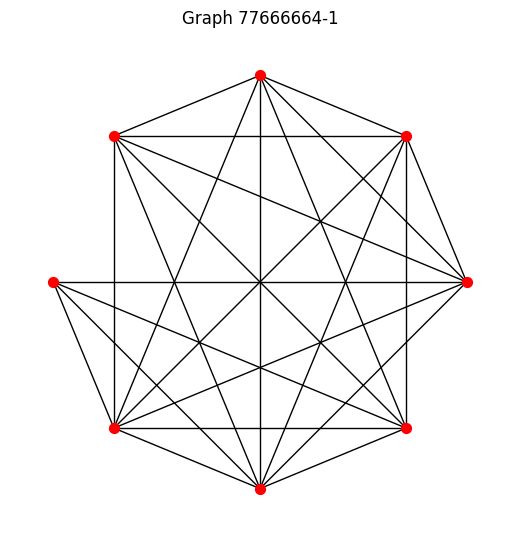


Sequence: 6, 6, 6, 6, 6, 6, 6, 4


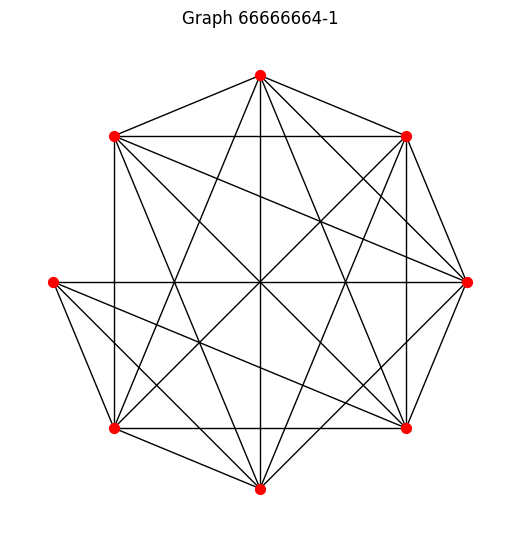


Sequence: 7, 6, 5, 5, 5, 5, 5, 4


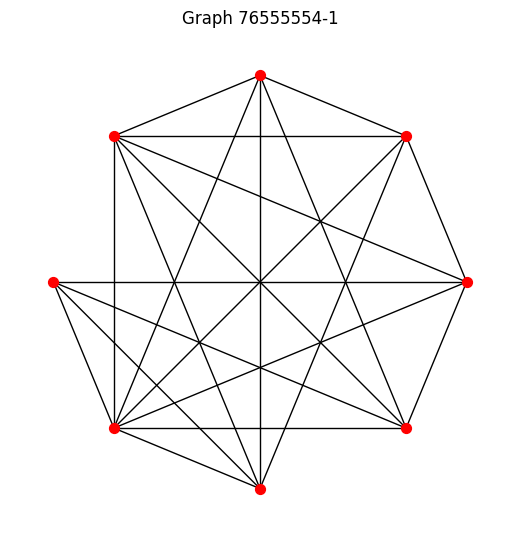

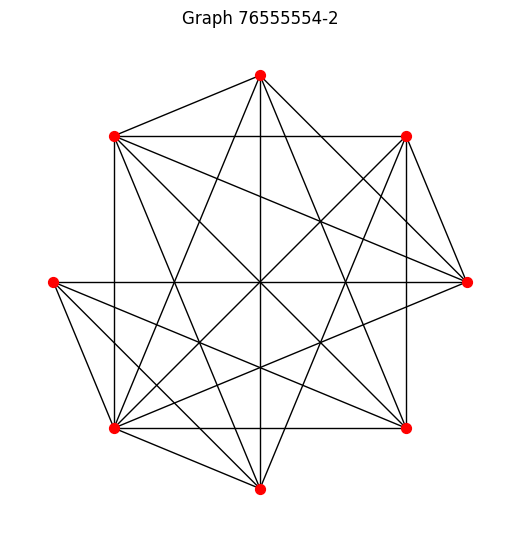

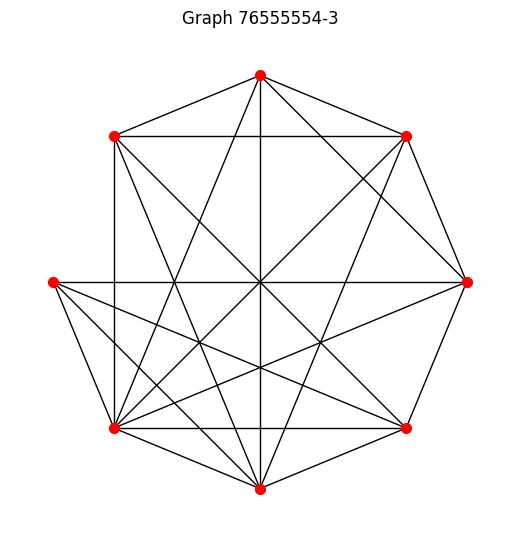

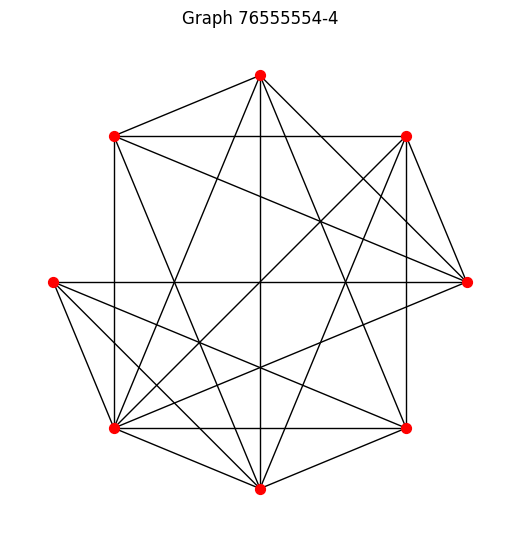

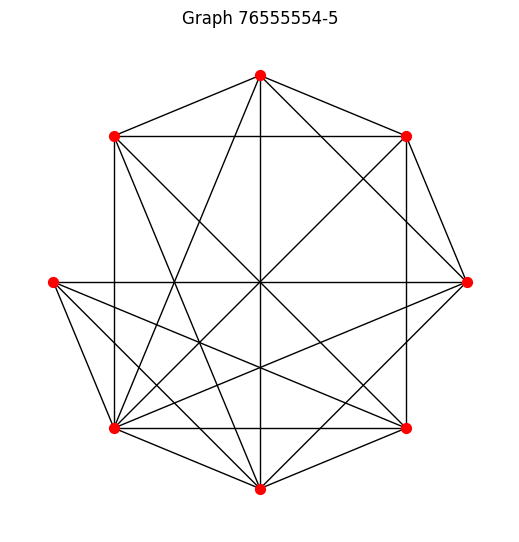


Sequence: 6, 5, 5, 5, 5, 5, 5, 4


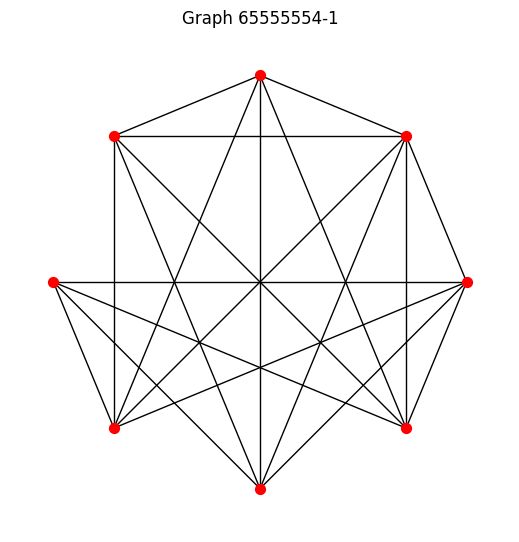

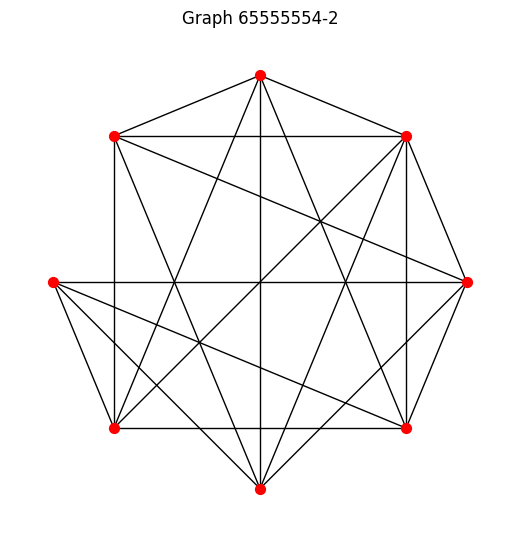

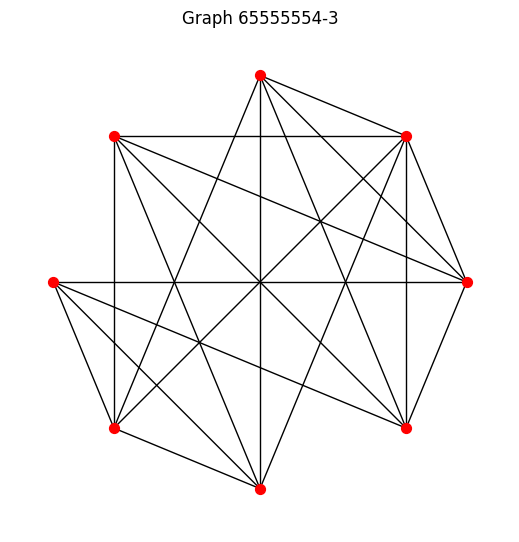

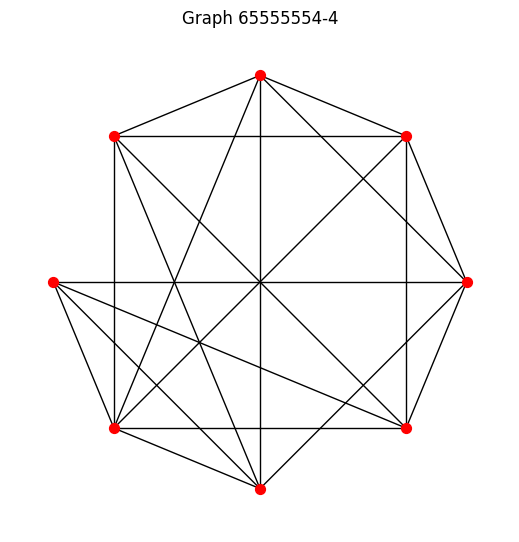

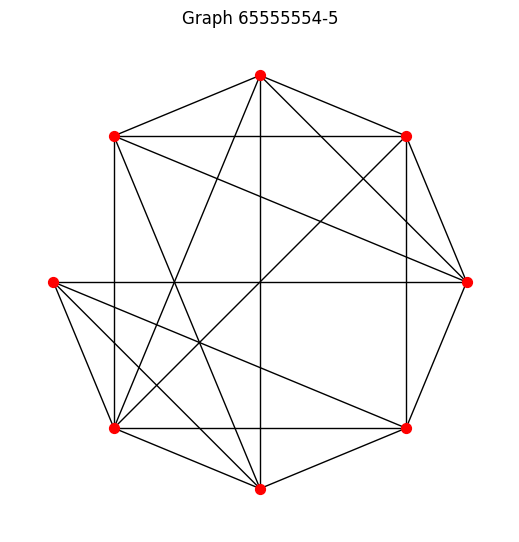

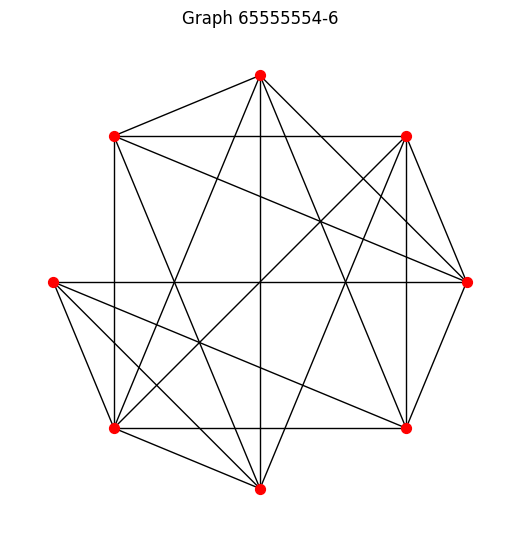

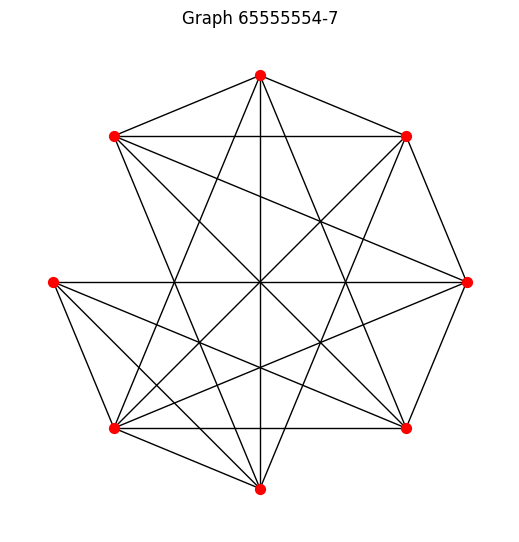

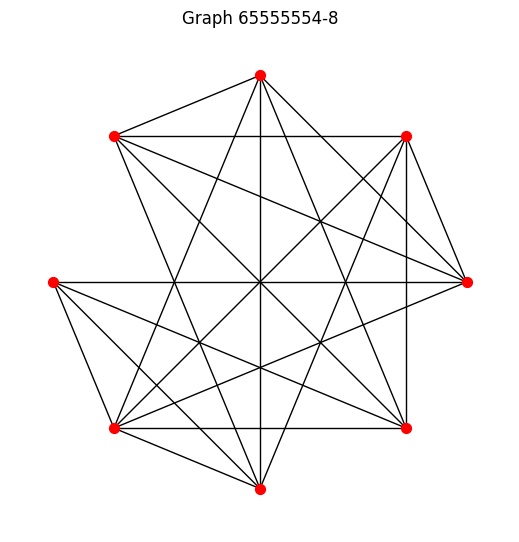


Sequence: 7, 6, 6, 6, 6, 6, 6, 3


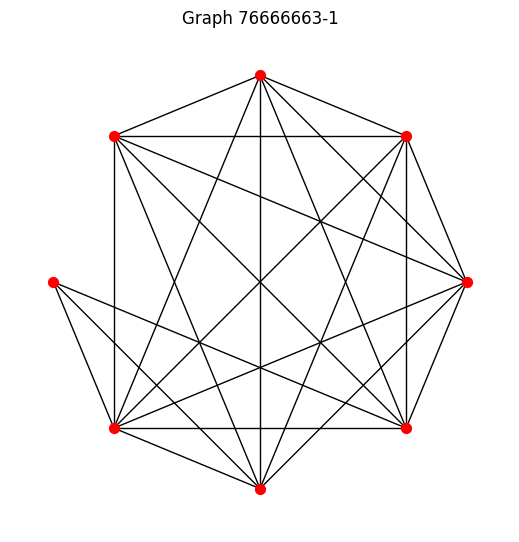


Sequence: 6, 6, 5, 5, 5, 5, 5, 3


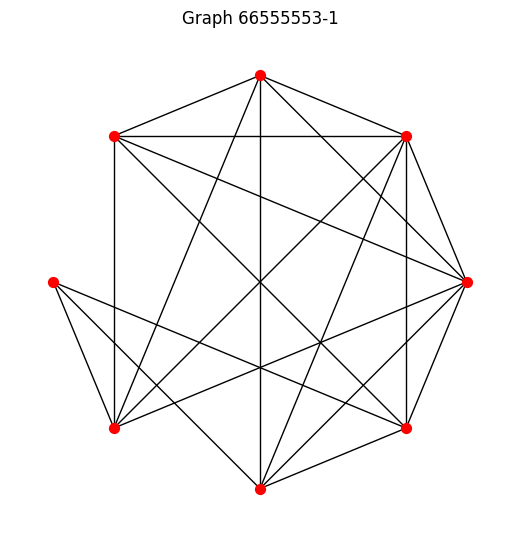

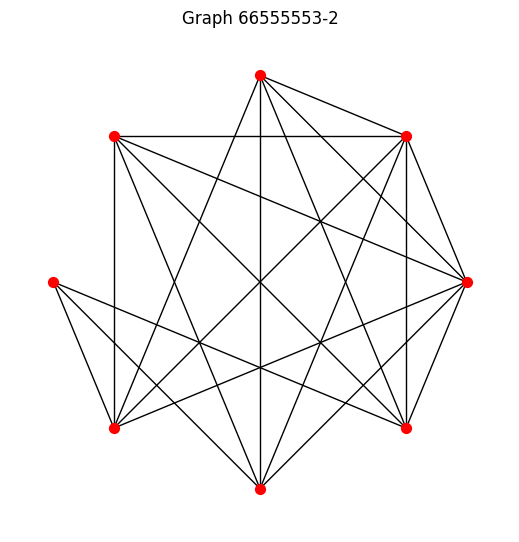

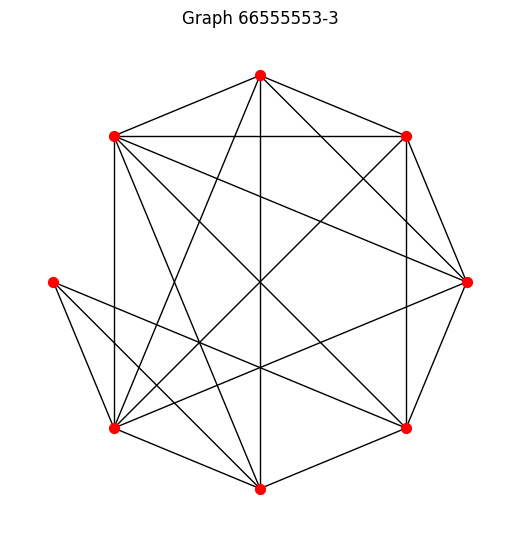

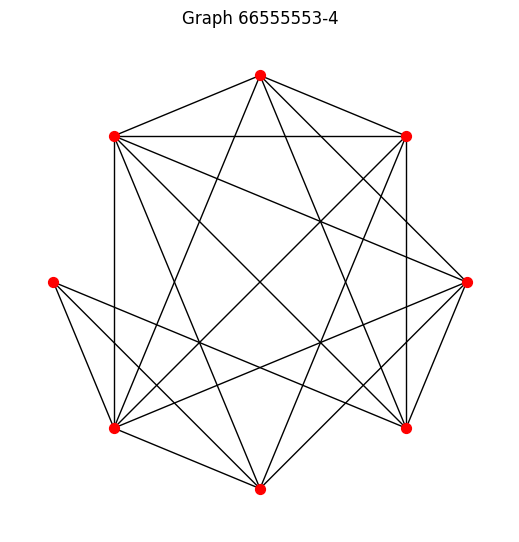

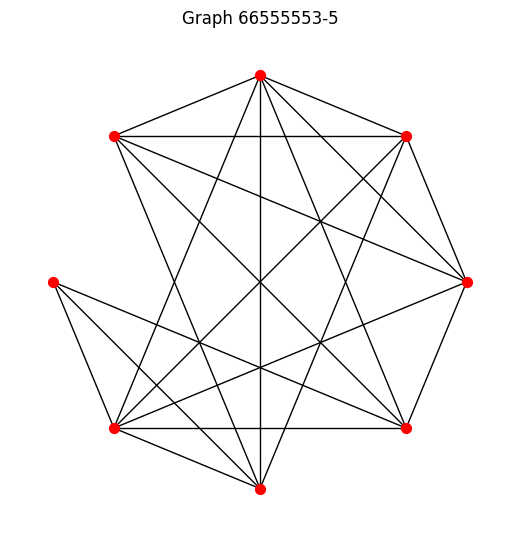

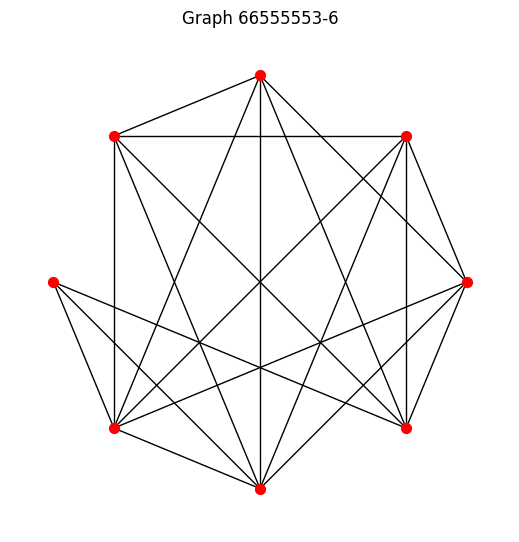

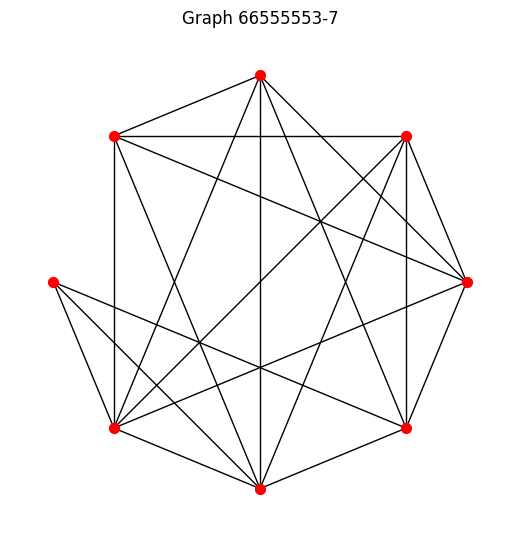

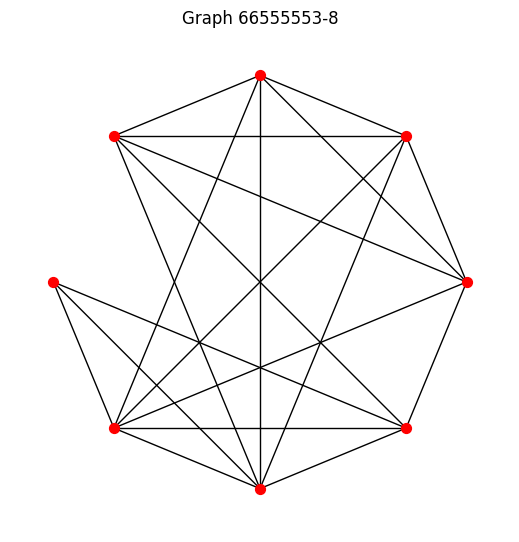

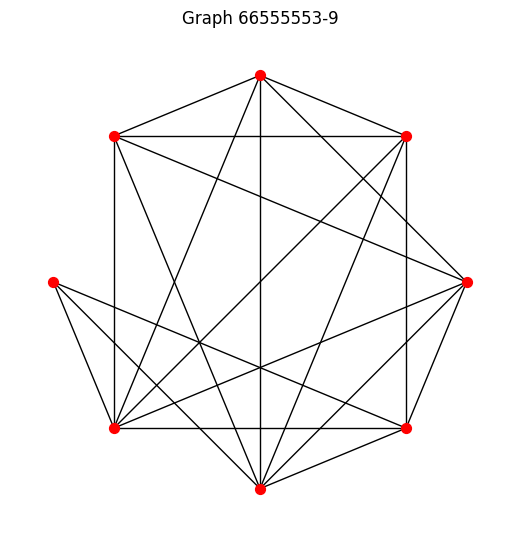


Sequence: 7, 7, 5, 5, 5, 5, 5, 3


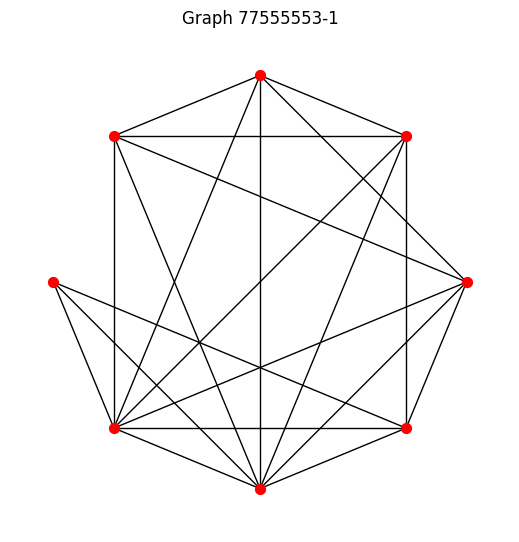


Sequence: 7, 5, 5, 5, 5, 5, 5, 3


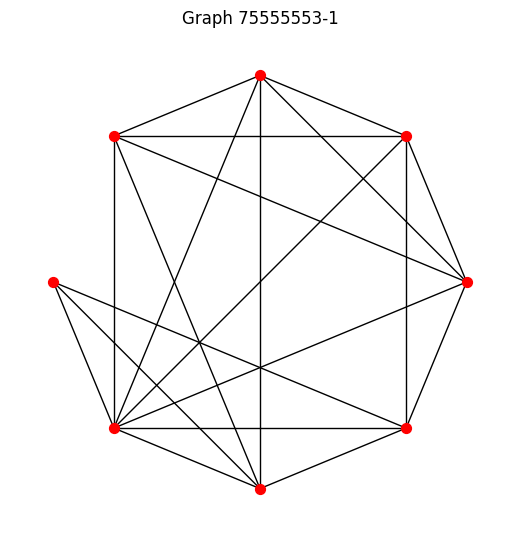

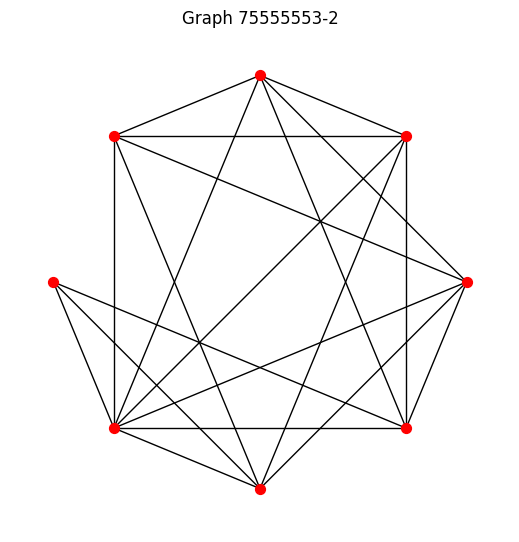


Sequence: 5, 5, 5, 5, 5, 5, 5, 3


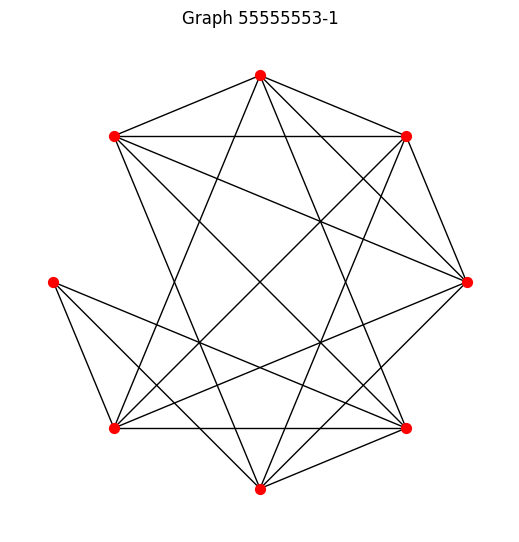

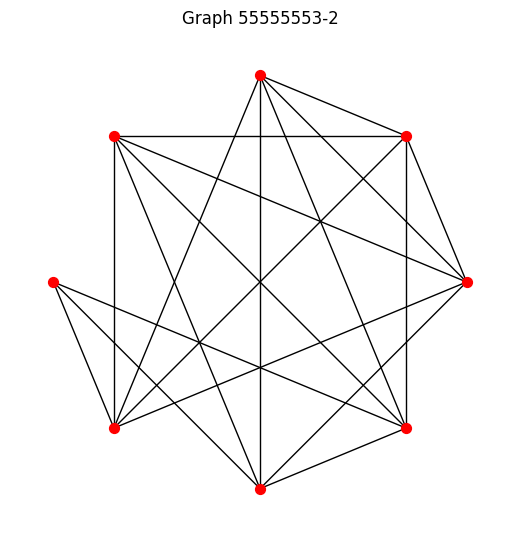

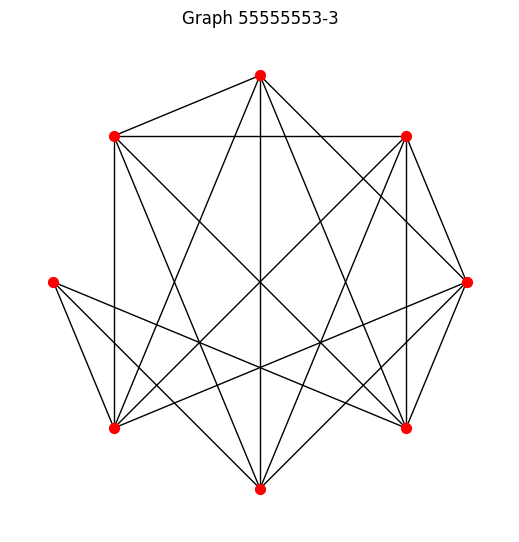

In [12]:
for record in results:
    sequence = record["sequence"]

    print("Sequence: " + ", ".join([str(x) for x in sequence]))
    
    for j, graph in enumerate(record["graphs"]):
        plt.figure(figsize = (5, 5))
        G = nx.Graph(graph)
        fixed = nx.shell_layout(G)
        nx.draw(G, pos = fixed, node_size = 50, node_color = "red")
        sequence = "".join([str(x) for x in sequence])
        plt.title(f"Graph {sequence}-{j + 1}")

        plt.savefig(f"figures/{sequence}-{j + 1}.png", bbox_inches = "tight")
        
        plt.show()

    print()